<h1>Requirements</h1>

In [1]:
!pip install matplotlib

<h1>Importing Modules</h1>

In [20]:
# base modules
import math
import random
import time
from DebugAssistant import *

#plotting
import matplotlib.pyplot as plt

#horner
from Old_Format.horner import Horner_method , Normal_method

#Interpolations
from Interpolations import Lagrange
from Interpolations import Newton
from Interpolations import CubicSpline
from Interpolations import LinearRegression

#Derivative
from Derivatives import NewtonDerivative

#EquationSolvers
from EquationSolvers import EquationSolvers

#Integral Calculators
from Old_Format.Integral import Simpsons38Rule , MidpointMethod
from IntegralCalculators import NewtonCotes

<h1>Test Functions</h1>

In [23]:
def linspace(start : float,end : float,n : int):
    
    if start > end :
        raise ValueError(f"input is invalid")

    h = (end - start) / n

    values = []
    for i in range(n + 1):
        value = round(start + i * h,5)
        values.append(value)
    
    return values

In [24]:
def arange(start : float,end : float,step : float):
    
    if start > end :
        raise ValueError(f"input is invalid")

    values = []
    value = start

    while value <= end:
        values.append(value)
        value = round(value + step , 5)
    
    return values

<h1>Horner Method</h1>

<p> p(x) = 123.78*x^5 + 12*x^4 + 23*x^3 + 3*x^2 + 5*x^1 + 10 </p>

In [29]:
factors = [ 10 , 5 , 3 , 23 , 12 , 123.78]
x = 1024

In [30]:
start = time.time()

p_x = Normal_method(factors,x)

end = time.time()

print(f"p({x}) = {p_x}")
print(f"time : {end - start} s")

p(1024) = 1.3937710930772613e+17
time : 0.5003490447998047 s


In [31]:
start = time.time()

p_x = Horner_method(factors,x)

end = time.time()

print(f"p({x}) = {p_x}")
print(f"time : {end - start} s")

p(1024) = 1.3937710930772613e+17
time : 0.5003533363342285 s


<h1>Interpolations</h1>

<h2>Lagrange</h2>

In [34]:
x_points = [-1 , 0 , 2 , 3 ,  6] 
f_points = [ 1 , 0 , 4 , 9 , 36]

In [36]:
lagrange = Lagrange(x_points,f_points)

In [38]:
start = time.time()

x = random.uniform(lagrange.MinX,lagrange.MaxX)
p_x = lagrange(x)

end = time.time()

print(f"p({x}) = {p_x}")
print(f"time : {end - start} s")

p(2.2695105874387465) = 5.1506783045
time : 0.0003008842468261719 s


In [39]:
debug_off()

plot_data_x = arange(lagrange.MinX,lagrange.MaxX, 0.1)
plot_data_y = list(map(lagrange,plot_data_x))

debug_on()

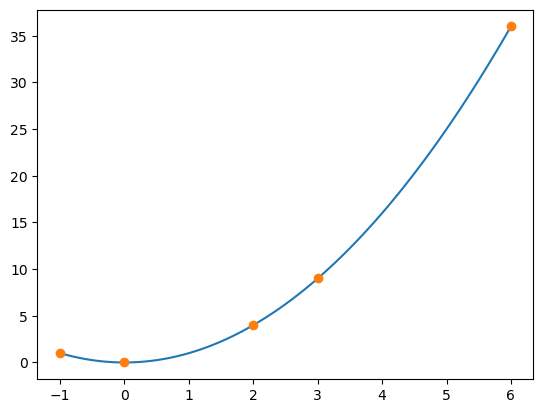

In [40]:
plt.plot(plot_data_x,plot_data_y)
plt.plot(x_points,f_points,'.',ms=12)
plt.show()

<h2>Newton</h2>

<h3>Finite Differences</h3>

In [44]:
x_points = [-1 ,  0 ,  1 , 2 , 3]
f_points = [-1 , -2 , -1 , 2 , 7]
is_forward = True

In [47]:
finite_differences = Newton(x_points,f_points,is_forward=is_forward)
#finite_differences = Newton.FiniteDifferences(x_points,f_points,is_forward=is_forward)

                           -( Finite Differences Table )-                           
Δ^i f(x)\ Xi |      -1     |      0      |      1      |      2      |      3      |
     f(x)    |     (-1)    ↓      -2     ↓      -1     ↓      2      ↓      7      
   Δ^1 f(x)  |            (-1)    ↓      1      ↓      3      ↓      5      
   Δ^2 f(x)  |                   (2)     ↓      2      ↓      2      
   Δ^3 f(x)  |                          (0)     ↓      0      
   Δ^4 f(x)  |                                 (0)     


In [50]:
start = time.time()

x = random.uniform(finite_differences.MinX,finite_differences.MaxX)
p_x = finite_differences(x)

end = time.time()

print(f"p({x}) = {p_x}")
print(f"time : {end - start} s")

p(0.234052489327492) = -1 + -1 * (1.2340524893) + 2 * (0.14441652846206068) + 0 * (-0.03687182682648369) + 0 * (0.016278427700719383) = -1.9452194323999998
p(0.234052489327492) = -1.9452194323999998
time : 0.00047206878662109375 s


In [53]:
debug_off()

plot_data_x = arange(finite_differences.MinX,finite_differences.MaxX, 0.1)
plot_data_y = list(map(finite_differences,plot_data_x))

debug_on()

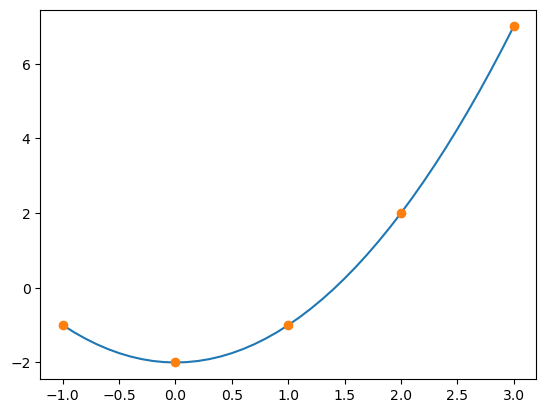

In [54]:
plt.plot(plot_data_x,plot_data_y)
plt.plot(x_points,f_points,'.',ms=12)
plt.show()

<h3>Divided Differences</h3>

In [56]:
x_points = [-1 ,  0 ,  2 ,   5 ,   6]
f_points = [-1 ,  0 ,  8 , 125 , 216]
is_forward = True

In [58]:
divided_differences = Newton(x_points,f_points,is_forward=is_forward)
#divided_differences = Newton.DividedDifferences(x_points,f_points,is_forward=is_forward)

                              -( Divided Differences Table )-                              
 f[xi,...,xi+k] \Xi |      -1     |      0      |      2      |      5      |      6      |
        f(x)        |     (-1)    ↓      0      ↓      8      ↓     125     ↓     216     
   f[xi,...xi+1]    |           (1.0)    ↓     4.0     ↓     39.0    ↓     91.0    
   f[xi,...xi+2]    |                  (1.0)    ↓     7.0     ↓     13.0    
   f[xi,...xi+3]    |                         (1.0)    ↓     1.0     
   f[xi,...xi+4]    |                                (0.0)    


In [59]:
start = time.time()

x = random.uniform(divided_differences.MinX,divided_differences.MaxX)
p_x = divided_differences(x)

end = time.time()

print(f"p({x}) = {p_x}")
print(f"time : {end - start} s")

p(2.7105276642054217) = -1 + 91.0 * (3.7105276642) + 13.0 * (10.057487882593506) + 1.0 * (7.146123372938968) + 0.0 * (-16.360851770557556) = 19.9141389197
p(2.7105276642054217) = 19.9141389197
time : 0.0003495216369628906 s


In [62]:
debug_off()

plot_data_x = arange(divided_differences.MinX,divided_differences.MaxX, 0.1)
plot_data_y = list(map(divided_differences,plot_data_x))

debug_on()

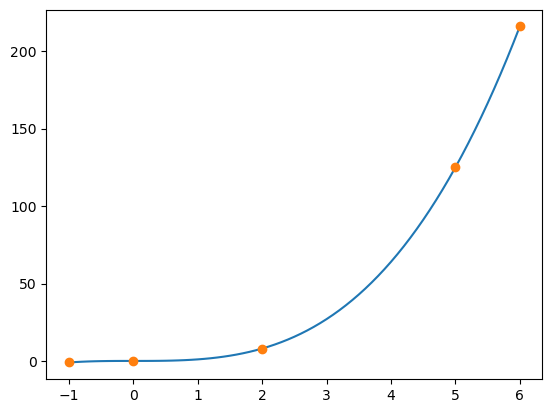

In [66]:
plt.plot(plot_data_x,plot_data_y)
plt.plot(x_points,f_points,'.',ms=12)
plt.show()

<h2>Cubic Spline</h2>

In [69]:
x_points = [0 , 0.05 , 0.1]
f_points = [1 , 2    , 3  ]

In [70]:
cubic_spline = CubicSpline(x_points,f_points)

Spline Polynomials :
0 => S(x) = (1) + (20.0) * (x - 0) + (0) * (x - 0)^2 + (0.0) * (x - 0)^3                                         , x in [0 , 0.05]
1 => S(x) = (2) + (20.0) * (x - 0.05) + (0) * (x - 0.05)^2 + (0.0) * (x - 0.05)^3                                , x in [0.05 , 0.1]


In [72]:
start = time.time()

x = random.uniform(cubic_spline.MinX,cubic_spline.MaxX)
p_x = cubic_spline(x)

end = time.time()

print(f"p({x}) = {p_x}")
print(f"time : {end - start} s")

0 => S(0.014092375797543489) = (1) + (20.0) * (0.014092375797543489 - 0) + (0) * (0.014092375797543489 - 0)^2 + (0.0) * (0.014092375797543489 - 0)^3  = 1.281847516
p(0.014092375797543489) = 1.281847516
time : 0.0006537437438964844 s


In [74]:
debug_off()

plot_data_x = arange(cubic_spline.MinX,cubic_spline.MaxX, 0.1)
plot_data_y = list(map(cubic_spline,plot_data_x))

debug_on()

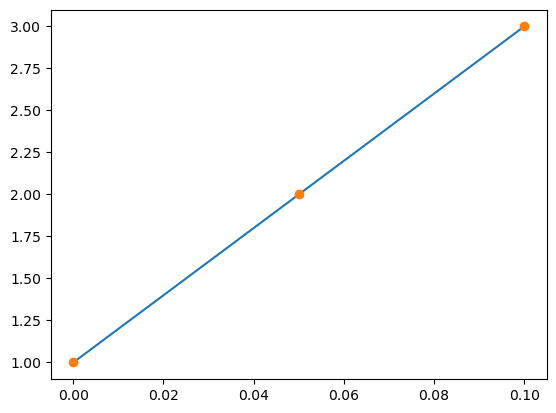

In [77]:
plt.plot(plot_data_x,plot_data_y)
plt.plot(x_points,f_points,'.',ms=12)
plt.show()

<h2>Linear Regression</h2>

In [79]:
x_points = linspace(0,10,50)

f_x = lambda x : x**2 * random.uniform(0.70,1.3)

f_points = [f_x(x) for x in x_points]
k = 2

In [82]:
linear_regression = LinearRegression(x_points,f_points,k=k)

f(x) = 1.161215218 * x^2 + -0.8970200168 * x + 0.32443331  ,MSE : 38.700632203


In [86]:
start = time.time()

x = random.uniform(linear_regression.MinX,linear_regression.MaxX)
p_x = linear_regression(x)

end = time.time()

print(f"p({x}) = {p_x}")
print(f"time : {end - start} s")

f(7.260212907985282) = 1.161215218 * 7.260212907985282^2 + -0.8970200168 * 7.260212907985282 + 0.32443331 = 55.0203340908
p(7.260212907985282) = 55.0203340908
time : 0.00030732154846191406 s


In [88]:
debug_off()

plot_data_x = arange(linear_regression.MinX,linear_regression.MaxX, 0.1)
plot_data_y = list(map(linear_regression,plot_data_x))

debug_on()

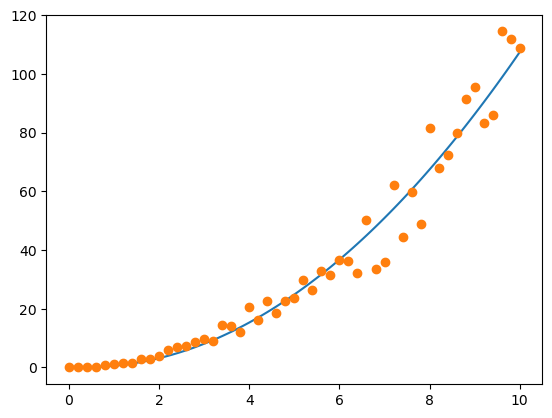

In [89]:
plt.plot(plot_data_x,plot_data_y)
plt.plot(x_points,f_points,'.',ms=12)
plt.show()

<h1>Derivatives</h1>

<h2>Newton Derivative</h2>

In [171]:
x_points = [ 0.1 , 0.2 , 0.3 , 0.4]
f_points = [-1   , 2   , 3   , 5]

In [173]:
newton_derivative = NewtonDerivative(x_points,f_points)

<h3> Xi  Derivative</h3>

In [195]:
start = time.time()

x = 0.1
p_x = newton_derivative(x ,step = -1)

end = time.time()

print(f"p'({x}) = {p_x}")
print(f"time : {end - start} s")

p'( 0.1 ) =( 3 * (1.0) + -2 * (-0.5) + 3 * (0.3333333333) ) * (10.0)= 49.999999999 (step : 3)
                  -( Finite Differences Table )-                  
Δ^i f(x)\ Xi |    0.1     |    0.2     |    0.3     |    0.4     |
     f(x)    |     -1     ↓     2      ↓     3      ↓     5      
   Δ^1 f(x)  |           (3)     ↓     1      ↓     2      
   Δ^2 f(x)  |                  (-2)    ↓     1      
   Δ^3 f(x)  |                         (3)     
p'(0.1) = 49.999999999
time : 0.001117706298828125 s


<h3> Xi+1  Derivative</h3>

In [198]:
start = time.time()

x = 0.1
p_x = newton_derivative.predict_next_step(x,step = -1)

end = time.time()

print(f"p'({x} + h) = {p_x}")
print(f"time : {end - start} s")

p'( 0.2 ) =( 3 * (1.0) + -2 * (0.5) + 3 * (-0.1666666667) ) * (10.0)= 14.999999999 (step : 3)
                  -( Finite Differences Table )-                  
Δ^i f(x)\ Xi |    0.1     |    0.2     |    0.3     |    0.4     |
     f(x)    |     -1     ↓     2      ↓     3      ↓     5      
   Δ^1 f(x)  |           (3)     ↓     1      ↓     2      
   Δ^2 f(x)  |                  (-2)    ↓     1      
   Δ^3 f(x)  |                         (3)     
p'(0.1 + h) = 14.999999999
time : 0.0004971027374267578 s


<h3> Xi+0.5 Derivative</h3>

In [201]:
start = time.time()

x = 0.1
p_x = newton_derivative.predict_next_half_step(x,step = -1)

end = time.time()

print(f"p'({x} + h/2) = {p_x}")
print(f"time : {end - start} s")

p'( 0.15 ) =( 3 * (1.0) + -2 * (0.0) + 3 * (-0.0416666667) ) * (10.0)= 28.749999999 (step : 3)
                  -( Finite Differences Table )-                  
Δ^i f(x)\ Xi |    0.1     |    0.2     |    0.3     |    0.4     |
     f(x)    |     -1     ↓     2      ↓     3      ↓     5      
   Δ^1 f(x)  |           (3)     ↓     1      ↓     2      
   Δ^2 f(x)  |                  (-2)    ↓     1      
   Δ^3 f(x)  |                         (3)     
p'(0.1 + h/2) = 28.749999999
time : 0.0014827251434326172 s


<h1>Equation Solvers</h1>

<p>4*x0 +   x1 + 2*x2 = 4</p></br>
<p>3*x0 + 5*x1 + x2 = 7</p></br>
<p>x0 +   x1 + 3*x2 = 3</p></br>

<h2>Gauss Jacobi</h2>

In [107]:
a         = [[4 , 1 , 2],
             [3 , 5 , 1],
             [1 , 1 , 3]]

b         =  [4 , 7 , 3]
starter_x =  [0 , 0 , 0]


In [109]:
answer_x = EquationSolvers.gauss_jacobi(a,starter_x,b,max_iteration = 20)
print()
print(f"Results = {answer_x}")

                             -( Gauss–Jacobi Table )-                               
iteration \ X |       X0      |       X1      |       X2      |   mean error  | note 
 iteration 0  |       0       |       0       |       0       |  4.6666666667 | 
 iteration 1  |      1.0      |      1.4      |  0.9999999999 |       3.0     | 
 iteration 2  |  0.1500000001 |      0.6      |      0.2      |  2.3333333333 | 
 iteration 3  |      0.75     |  1.2699999999 |  0.7499999999 |  1.6666666667 | 
 iteration 4  |  0.3075000001 |      0.8      |  0.3266666667 |  1.3333333333 | 
 iteration 5  |  0.6366666667 |  1.1501666666 |  0.6308333332 |       1.0     | 
 iteration 6  |  0.3970416667 |  0.8918333333 |  0.4043888889 |  0.6666666667 | 
 iteration 7  |  0.5748472222 |  1.0808972222 |  0.5703749999 |  0.6666666667 | 
 iteration 8  |  0.4445881945 |  0.9410166667 |  0.4480851852 |  0.3333333333 | 
 iteration 9  |  0.5407032407 |  1.0436300463 |  0.5381317129 |       0.0     | 

Results = [0.54070

<h2>Gauss Seidel</h2>

In [112]:
a         = [[4 , 1 , 2],
             [3 , 5 , 1],
             [1 , 1 , 3]]

b         =  [4 , 7 , 3]
starter_x =  [0 , 0 , 0]

In [114]:
answer_x = EquationSolvers.gauss_seidel(a,starter_x,b,max_iteration = 20)
print()
print(f"Results = {answer_x}")

                             -( Gauss–Seidel Table )-                               
iteration \ X |       X0      |       X1      |       X2      |   mean error  | note 
 iteration 0  |       0       |       0       |       0       |  4.6666666667 | 
 iteration 1  |      1.0      |      0.8      |      0.4      |  0.6666666667 | 
 iteration 2  |      0.6      |      0.96     |      0.48     |       0.0     | 

Results = [0.6, 0.96, 0.48]


<h1>Integral Calculators</h1>

<h2>MidpointMethod</h2>

In [145]:
x_points = [0.1 , 0.15 , 0.2 ,0.25, 0.3]
f_points = [0.00998 , 0.02242 , 0.03973 , 0.06185 , 0.08866]

data = {"x_points":x_points,"f_points":f_points}

In [203]:
start = time.time()

result = MidpointMethod(**data)

end = time.time()

print(f"result = {result}")
print(f"time : {end - start} s")

result = 0.008427
time : 0.00018215179443359375 s


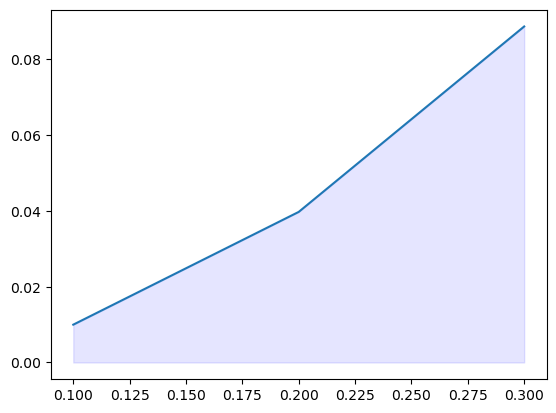

In [149]:
debug_off()

finite_differences = Newton(x_points,f_points,is_forward=True)
plot_data_x = arange(finite_differences.MinX,finite_differences.MaxX, 0.1)
plot_data_y = list(map(finite_differences,plot_data_x))

debug_on()
fig, ax = plt.subplots()
ax.plot(plot_data_x,plot_data_y)
ax.fill_between(plot_data_x, plot_data_y, 0, color='blue', alpha=.1)
plt.show()

<h2>Simpsons 3/8 Rule</h2>

In [153]:
x_points = [0.1 , 0.15 , 0.2 ,0.25, 0.3]
f_points = [0.00998 , 0.02242 , 0.03973 , 0.06185 , 0.08866]

data = {"x_points":x_points,"f_points":f_points}

In [205]:
start = time.time()

result = Simpsons38Rule(**data)

end = time.time()

print(f"result = {result}")
print(f"time : {end - start} s")

result = 0.0085863333
time : 0.00023102760314941406 s


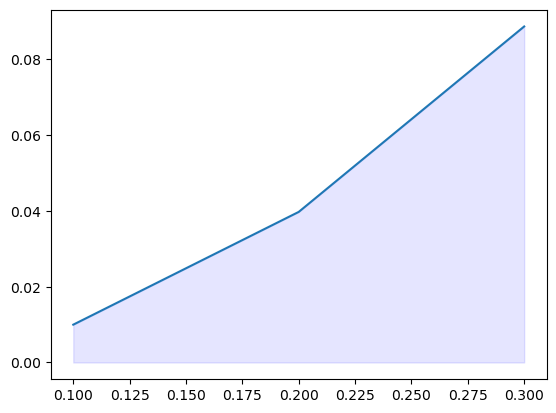

In [157]:
debug_off()

finite_differences = Newton(x_points,f_points,is_forward=True)
plot_data_x = arange(finite_differences.MinX,finite_differences.MaxX, 0.1)
plot_data_y = list(map(finite_differences,plot_data_x))

debug_on()
fig, ax = plt.subplots()
ax.plot(plot_data_x,plot_data_y)
ax.fill_between(plot_data_x, plot_data_y, 0, color='blue', alpha=.1)
plt.show()

<h2>Newton Cotes</h2>

In [207]:
x_points = [0 , 1 , 2 , 3]
f_points = [2 , 3 , 6 , 11]

In [209]:
newton_cotes = NewtonCotes(x_points,f_points)

In [211]:
start = time.time()

result = newton_cotes.execute()

end = time.time()

print(f"result = {result}")
print(f"time : {end - start} s")

integral(f(x),0,3):
(0.3962191348) * (2) + (0.8865740742) * (3) + (1.3026620383) * (6) + (0.3311899856) * (11) = 14.9112225636
result = 14.9112225636
time : 0.000400543212890625 s


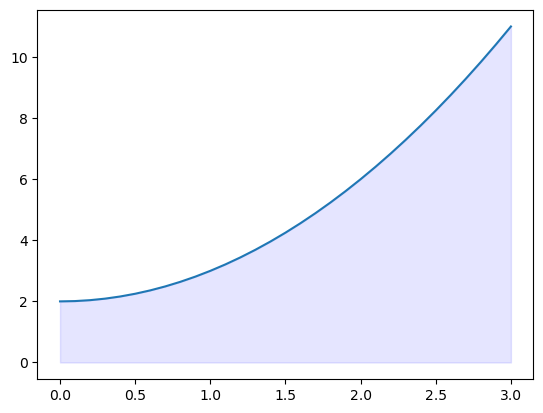

In [213]:
debug_off()

finite_differences = Newton(x_points,f_points,is_forward=True)
plot_data_x = arange(finite_differences.MinX,finite_differences.MaxX, 0.1)
plot_data_y = list(map(finite_differences,plot_data_x))

debug_on()
fig, ax = plt.subplots()
ax.plot(plot_data_x,plot_data_y)
ax.fill_between(plot_data_x, plot_data_y, 0, color='blue', alpha=.1)
plt.show()